# Ejercicios Práctica 1 
Esta práctica está diseñada para introducirte en las técnicas fundamentales de
procesamiento de imágenes necesarias para preparar datasets efectivos para proyectos de
Computer Vision.


In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
from io import BytesIO
from PIL import Image
import exifread
import pandas as pd

## 1) Creación de Imagen con cuatro cuadrantes de color

Genera una imagen de 200x200 píxeles utilizando numpy , donde cada cuadrante tenga un
color diferente:

- **Superior izquierdo:** Rojo (255, 0, 0)

- **Superior derecho:** Verde (0, 255, 0)

- **Inferior izquierdo:** Azul (0, 0, 255)

- **Inferior derecho:** Blanco (255, 255, 255)

Muestra la imagen generada utilizando matplotlib .


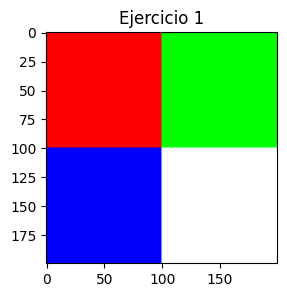

In [11]:
# Creación imagen RGB de 200x200, con todos los pixeles = 0
img_1 = np.zeros((200, 200, 3), dtype= np.uint8)

#    FILAS , COLUMNAS
img_1[:100 , :100] = [255, 0, 0]        # Superior izquierdo, Rojo
img_1[:100 , 100:] = [0, 255, 0]        # Superior derecho, Verde
img_1[100: , :100] = [0, 0, 255]        # Inferior izquierdo, Azul
img_1[100: , 100:] = [255, 255, 255]    # Inferior derecho, Blancho

# Gráfico
plt.figure(figsize= (3,3))
plt.title('Ejercicio 1')
plt.imshow(img_1);

## 2) Conversión de Imagen a Escala de Grises

1. Carga una imagen desde un archivo o desde una URL usando OpenCV .
2. Escribe dos funciones para convertir la imagen a escala de grises:
    - **Metodo 1**: Promediando los canales RGB manualmente
    - **Metodo 2**: Usando cv2.cvtColor() de OpenCV
3. Muestra las tres imágenes juntas (original, método 1 y método 2) y compara los
resultados.


In [18]:
# Función auxiliar para leer una imagen desde una URL con OpenCV
def read_image_from_url(url):
    response = requests.get(url)
    # Convertir la respuesta a un array de bytes. Obtenemos el JPG en memoria.
    image_bytes = np.array(bytearray(response.content), dtype=np.uint8)
    # Decodificar los bytes codificados como JPG en una imagen numpy
    image = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR) 
    return image

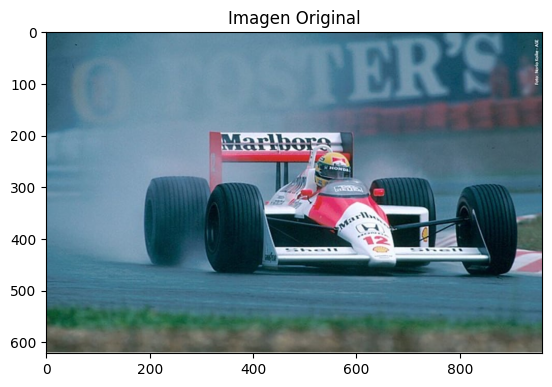

In [22]:
# Carga de imagen desde URL
url = "https://rtrsports.com/wp-content/uploads/2024/07/senna-1.jpg"

# Descarga de imágen
img_2 = read_image_from_url(url)

# Cambio a RGB
img_2_rgb = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

plt.figure()
plt.title('Imagen Original')
plt.imshow(img_2_rgb);

### Conversión a escala de grises de forma manual

In [23]:
def rgb_to_gray(rgb_image):
    # Asegurarse de que la imagen esté en formato float
    rgb_image = rgb_image.astype(np.float32)
    
    # Aplicar la fórmula de conversión
    gray_image = np.dot(rgb_image[..., :3], [0.299, 0.587, 0.114])
    
    # Asegurarse de que los valores estén en el rango [0, 255]
    gray_image = np.clip(gray_image, 0, 255)
    
    # Convertir de vuelta a uint8
    return gray_image.astype(np.uint8)

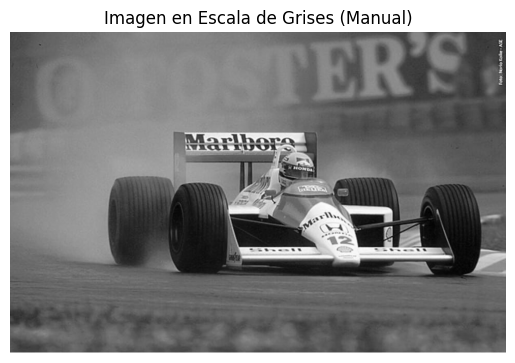

In [26]:
img_2_manual_gray = rgb_to_gray(img_2_rgb)

plt.figure()
plt.title('Imagen en Escala de Grises (Manual)')
plt.axis('off')
plt.imshow(img_2_manual_gray, cmap = 'gray');

### Convirtiendo con OpenCV

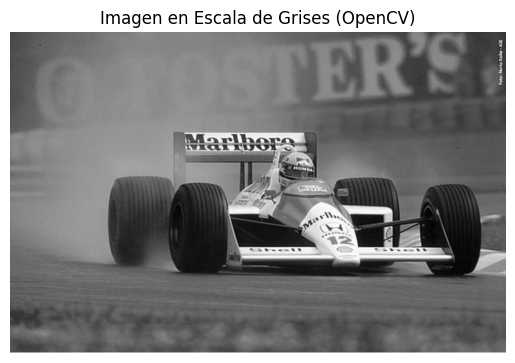

In [27]:
img_2_opencv_gray = cv2.cvtColor(img_2_rgb, cv2.COLOR_RGB2GRAY)

plt.figure()
plt.title('Imagen en Escala de Grises (OpenCV)')
plt.axis('off')
plt.imshow(img_2_opencv_gray, cmap = 'gray');

### Resultado Final

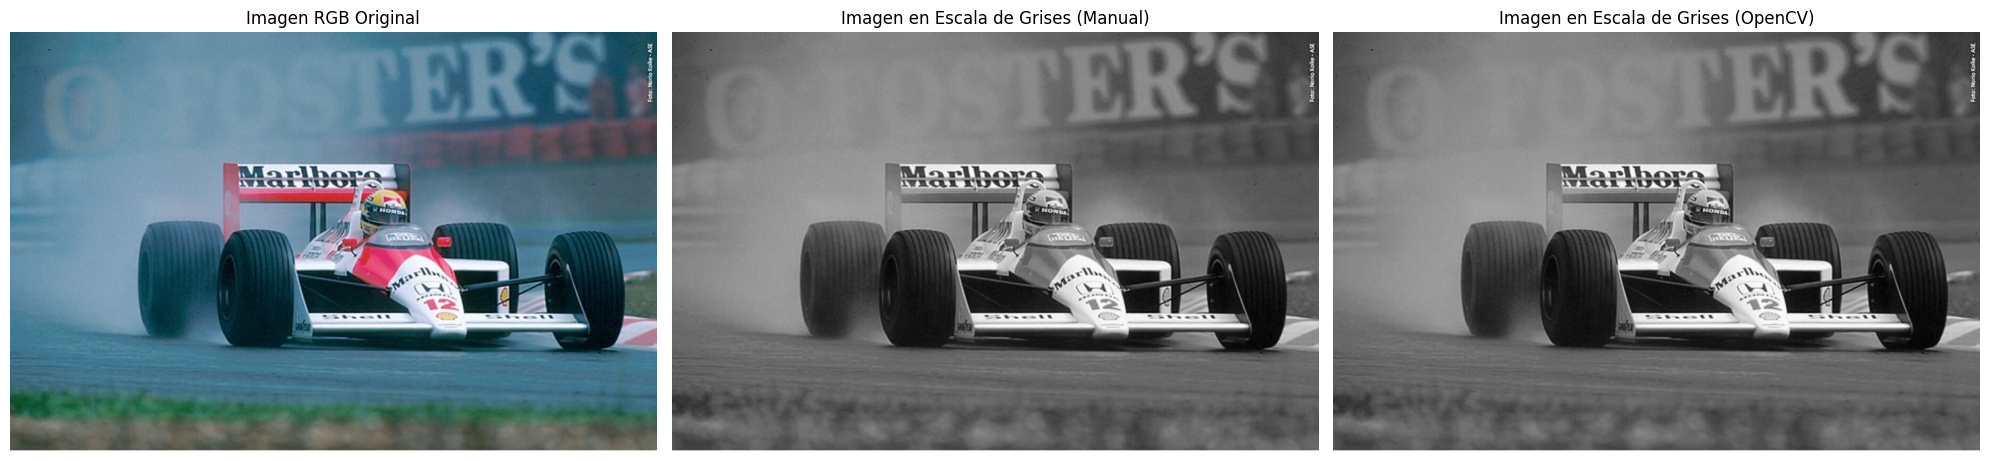

In [31]:
# Visualizar los resultados
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 7))

ax1.imshow(img_2_rgb)
ax1.set_title('Imagen RGB Original')
ax1.axis('off')

ax2.imshow(img_2_manual_gray, cmap='gray')
ax2.set_title('Imagen en Escala de Grises (Manual)')
ax2.axis('off')


ax3.imshow(img_2_opencv_gray, cmap='gray')
ax3.set_title('Imagen en Escala de Grises (OpenCV)')
ax3.axis('off')

plt.tight_layout()
plt.show()

## 3) Extracción de Metadastos EXIF

1. Carga una imagen tomada con una cámara o un celular.
2. Utiliza exifread y Pillow para extraer los metadatos EXIF.
3. Imprime estos valores y explica qué significan.

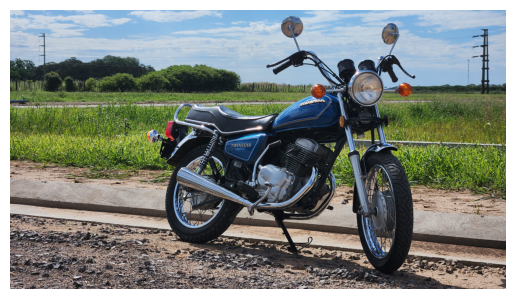

,Tag,Value
0,Image ImageWidth,4000
1,Image ImageLength,2252
2,Image Make,samsung
3,Image Model,SM-S901E
4,Image Orientation,Horizontal (normal)
5,Image XResolution,72
6,Image YResolution,72
7,Image ResolutionUnit,Pixels/Inch
8,Image Software,S901EXXSAEXGE
9,Image DateTime,2024:12:08 16:17:43


In [80]:
img_3_bgr = cv2.imread('.\data\img_moto.jpg')
img_3_rgb = cv2.cvtColor(img_3_bgr, cv2.COLOR_BGR2RGB)

plt.figure()
plt.axis('off')
plt.imshow(img_3_rgb)
plt.show()

exif_data: pd.DataFrame = pd.DataFrame(columns = ['Tag', 'Value'])
# Usando ExifRead
with open(".\data\img_moto.jpg", "rb") as img_3:    
    tags = exifread.process_file(img_3)
    
    for tag, value in tags.items(): 
        new_row = pd.DataFrame({'Tag': [tag], 'Value': [value]})
        
        exif_data = pd.concat([exif_data, new_row], ignore_index=True)

exif_data


## 4) Comparación de efectos de compresión
1. Carga una imagen en formato JPG usando OpenCV .
2. Convierte la imagen a RGB para su correcta visualización en Matplotlib .
3. Guarda la imagen en formato JPG con distintos niveles de calidad:
    - Calidad alta: 95%
    - Calidad media: 50%
    - Calidad baja: 10% 
4. Carga las imágenes comprimidas y conviértelas a RGB para su correcta visualización.
5. Muestra las imágenes en una sola figura comparando la imagen original con las
versiones comprimidas.


In [81]:
# Carga de imagen
img_4_bgr = cv2.imread('.\data\img_moto.jpg')
img_4_rgb = cv2.cvtColor(img_3_bgr, cv2.COLOR_BGR2RGB)

In [91]:
# Creacion carpeta del ejercicio
os.makedirs('.\data\Ejercicio_4', exist_ok= True)

# Guardado de imagen con distintas calidades
cv2.imwrite('.\data\Ejercicio_4\imagen_calidad_alta.jpg', cv2.cvtColor(img_4_rgb, cv2.COLOR_RGB2BGR), [cv2.IMWRITE_JPEG_QUALITY, 100])  # Alta calidad
cv2.imwrite('.\data\Ejercicio_4\imagen_calidad_alta2.jpg', cv2.cvtColor(img_4_rgb, cv2.COLOR_RGB2BGR), [cv2.IMWRITE_JPEG_QUALITY, 95])  
cv2.imwrite('.\data\Ejercicio_4\imagen_calidad_media.jpg', cv2.cvtColor(img_4_rgb, cv2.COLOR_RGB2BGR), [cv2.IMWRITE_JPEG_QUALITY, 50])   # Calidad media
cv2.imwrite('.\data\Ejercicio_4\imagen_calidad_baja.jpg', cv2.cvtColor(img_4_rgb, cv2.COLOR_RGB2BGR), [cv2.IMWRITE_JPEG_QUALITY, 10])    # Baja calidad

True

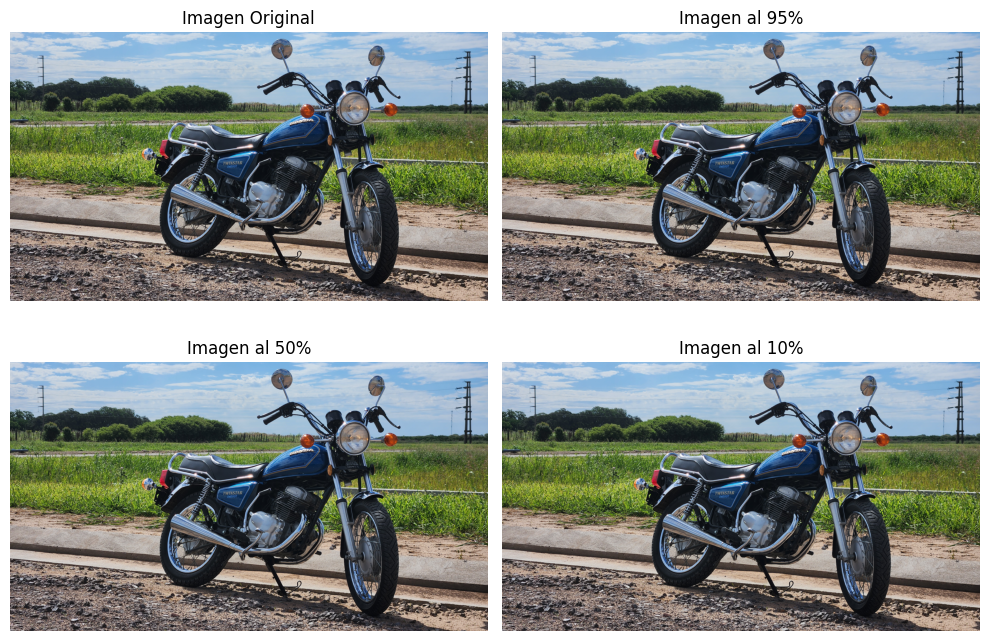

In [97]:
img4_100 = cv2.imread('.\data\Ejercicio_4\imagen_calidad_alta.jpg')
img4_100_rgb = cv2.cvtColor(img4_100, cv2.COLOR_BGR2RGB)

img4_95 = cv2.imread('.\data\Ejercicio_4\imagen_calidad_alta2.jpg')
img4_95_rgb = cv2.cvtColor(img4_100, cv2.COLOR_BGR2RGB)

img4_50 = cv2.imread('.\data\Ejercicio_4\imagen_calidad_media.jpg')
img4_50_rgb = cv2.cvtColor(img4_100, cv2.COLOR_BGR2RGB)

img4_10 = cv2.imread('.\data\Ejercicio_4\imagen_calidad_baja.jpg')
img4_10_rgb = cv2.cvtColor(img4_100, cv2.COLOR_BGR2RGB)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize= (10, 7))

# Imagen Original
axes[0,0].imshow(img4_100_rgb)
axes[0,0].set_title('Imagen Original')
axes[0,0].axis('off')

# Calidad 95%
axes[0,1].imshow(img4_95_rgb)
axes[0,1].set_title('Imagen al 95%')
axes[0,1].axis('off')

# Calidad 50%
axes[1,0].imshow(img4_50_rgb)
axes[1,0].set_title('Imagen al 50%')
axes[1,0].axis('off')

# Calidad 10%
axes[1,1].imshow(img4_10_rgb)
axes[1,1].set_title('Imagen al 10%')
axes[1,1].axis('off')

plt.tight_layout()
plt.show();